# Import relevant libraries

In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from pprint import pprint as pp
from networkx.algorithms import bipartite as bp
import matplotlib.pyplot as plt

# Load & Clean data
- artist_search_update.csv is an improved version with useless columns deleted
- create a new dataframe that contains columns of artist name and their genres only
- rename the columns to make life easier (optional)
- merge all the genres into one column named "genre"
- drop any empty rows & duplicates

In [2]:
# get current working directory
wd = os.getcwd()
wd

'/Users/Isabella/Desktop/isa_NA_FTP'

In [3]:
# %% import and clean data
# import data
infile = os.path.join(wd, 'dataset', 'artist_search_update.csv')
col_lst = ['artists.items.0.name','artists.items.0.genres.0', 'artists.items.0.genres.1',
           'artists.items.0.genres.2', 'artists.items.0.genres.3',
           'artists.items.0.genres.4', 'artists.items.0.genres.5',
           'artists.items.0.genres.6', 'artists.items.0.genres.7',
           'artists.items.0.genres.8', 'artists.items.0.genres.9']
artist_genre = pd.read_csv(infile, usecols = col_lst)

# rename columns
artist_genre.rename(columns={'artists.items.0.name':'artist_name',
                             'artists.items.0.genres.0':'g0',
                             'artists.items.0.genres.1':'g1',
                             'artists.items.0.genres.2':'g2',
                             'artists.items.0.genres.3':'g3',
                             'artists.items.0.genres.4':'g4',
                             'artists.items.0.genres.5':'g5',
                             'artists.items.0.genres.6':'g6',
                             'artists.items.0.genres.7':'g7',
                             'artists.items.0.genres.8':'g8',
                             'artists.items.0.genres.9':'g9'}, inplace=True)

# reorder columns
artist_genre = artist_genre[['artist_name','g0','g1','g2','g3','g4',
                             'g5','g6','g7','g8','g9']]

# drop rows with empty values
artist_genre.dropna(how='all', inplace = True)

# create a new data frame that contains two columns: artist_name & genres
# match each artist and his/her genre row by row
artist_genre1 = pd.DataFrame(columns = ['artist_name', 'genre'])

for i in range(0, 10):
    temp_df = artist_genre.loc[:, ['artist_name', 'g'+str(i)]]
    temp_df = temp_df.rename(columns = {'g'+str(i): 'genre'})
    artist_genre1 = pd.concat([artist_genre1, temp_df])

artist_genre = artist_genre1
artist_genre.dropna(inplace = True)

# drop duplicates
artist_genre.drop_duplicates(inplace = True)
artist_genre

,artist_name,genre
0,2 Chainz,atl hip hop
1,21 Savage,atl hip hop
2,24kGoldn,cali rap
3,42 Dugg,detroit trap
4,50 Cent,east coast hip hop
...,...,...
350,Yung Pinch,vapor trap
91,Empress Of,shiver pop
130,Jagged Edge,r&b
239,Plies,urban contemporary


In [4]:
# testing
artist_genre[artist_genre.artist_name == '2 Chainz']

,artist_name,genre
0,2 Chainz,atl hip hop
0,2 Chainz,gangster rap
0,2 Chainz,hip hop
0,2 Chainz,pop rap
0,2 Chainz,rap
0,2 Chainz,southern hip hop
0,2 Chainz,trap


# Project a two-mode, unweighted network between artist and genre
- bottom nodes: artists
- top nodes: genre
- get a 1-mode network (artist-artist) from this 2-mode network
- edge: an edge will be built if two artists share the same genre

In [5]:
# %% graph creation
bg = nx.Graph()

In [6]:
# get bottom_nodes
bottom_nodes = list(set(artist_genre.artist_name))

In [7]:
# get top_nodes
top_nodes = list(set(artist_genre.genre))

In [8]:
# add nodes
bg.add_nodes_from(bottom_nodes, bipartite=0)
bg.add_nodes_from(top_nodes, bipartite=1)

In [9]:
# get edge list
edge = []

for i in zip(artist_genre['artist_name'],artist_genre['genre']):
    edge.append(i)

edge

[('2 Chainz', 'atl hip hop'),
 ('21 Savage', 'atl hip hop'),
 ('24kGoldn', 'cali rap'),
 ('42 Dugg', 'detroit trap'),
 ('50 Cent', 'east coast hip hop'),
 ('6ix9ine', 'emo rap'),
 ('6LACK', 'alternative r&b'),
 ('9lokknine', 'florida rap'),
 ('A Boogie Wit da Hoodie', 'melodic rap'),
 ('A$AP Ferg', 'hip hop'),
 ('A$AP Rocky', 'east coast hip hop'),
 ('Ali Gatie', 'canadian hip hop'),
 ('Alicia Keys', 'hip pop'),
 ('Ambjaay', 'cali rap'),
 ('Aminé', 'hip hop'),
 ('Anderson .Paak', 'escape room'),
 ('Ant Clemons', 'alternative r&b'),
 ('Anuel AA', 'latin'),
 ('Aretha Franklin', 'classic soul'),
 ('Ariana Grande', 'pop'),
 ('Arizona Zervas', 'pop rap'),
 ('Ashanti', 'dance pop'),
 ('Baby Keem', 'hip hop'),
 ('Bad Bunny', 'latin'),
 ('Ball Greezy', 'miami hip hop'),
 ('Bastille', 'metropopolis'),
 ('bbno$', 'canadian hip hop'),
 ('Beatking', 'houston rap'),
 ('Bebe Rexha', 'dance pop'),
 ('Belly', 'canadian hip hop'),
 ('Beyoncé', 'dance pop'),
 ('Bhad Bhabie', 'pop'),
 ('Big Sean', 'detro

In [10]:
# add edge
bg.add_edges_from(edge)

In [11]:
# `is bipartite` check
is_bip = nx.is_bipartite(bg)
is_bip

True

In [12]:
# get artist-artist graph only (edge -> share same genre)
g_b = bp.projected_graph(bg, bottom_nodes)

# Plot the artist-artist network graph

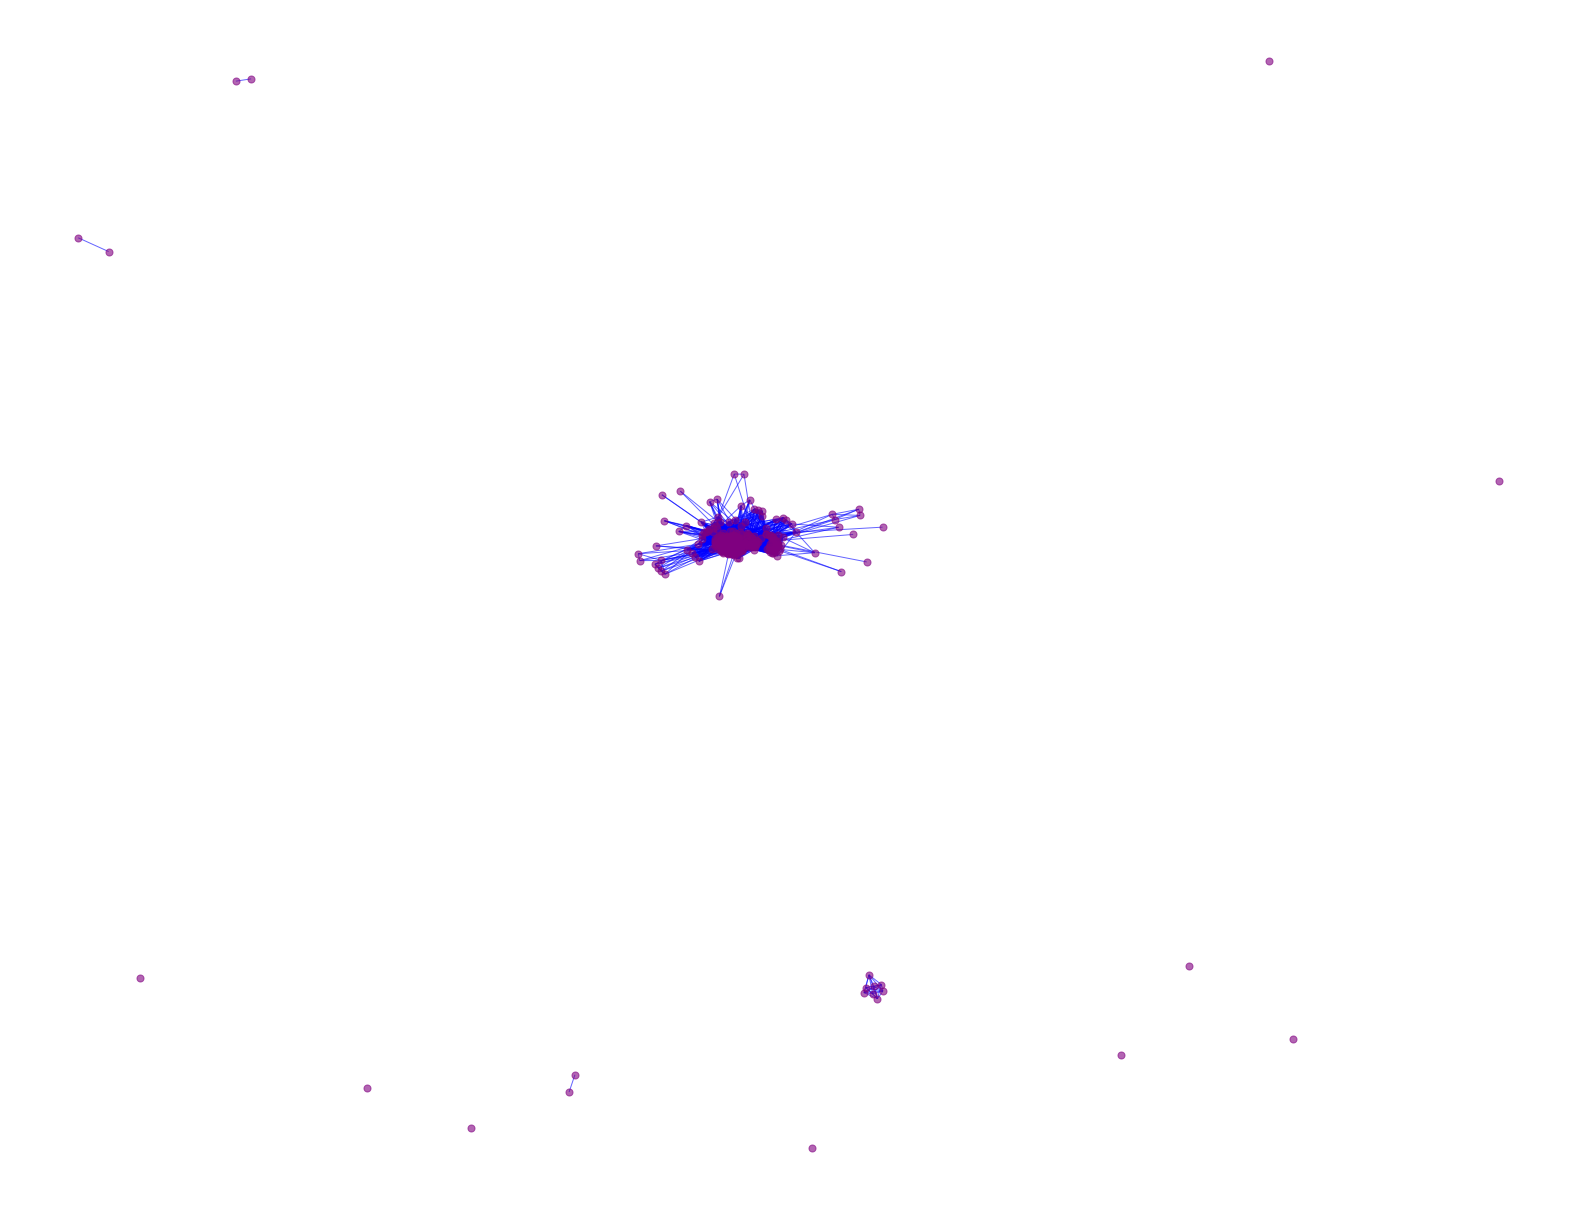

In [13]:
# set the figure
fig = plt.figure(figsize = (28, 22))
pos = nx.spring_layout(g_b)

# drawing options
options = {'alpha': 0.6,'node_size': 50}

# draw the network
nx.draw_networkx_nodes(g_b, pos, 
                       node_color ='purple',
                       **options)

nx.draw_networkx_edges(g_b, pos, 
                       edge_color ='blue',
                       **options)

plt.axis("off")

# save the plot
outfile = os.path.join(wd, 'genre artist-artist graph.png')
plt.savefig(outfile)

# Use Louvain algorithm to detect communities
- nodes with same color indicates that they are grouped into the same community by Louvain algorithm

In [14]:
import matplotlib.cm as cm
import community as community_louvain

In [15]:
partition = community_louvain.best_partition(g_b)
len(partition)

315

In [16]:
# modularity
print('\nModularity: '+
      str(community_louvain.modularity(partition, g_b)))


Modularity: 0.16105589240356288


In [17]:
# create a list of communities and the number of nodes each community contains
communityList = sorted(list(set(partition.values())))
for c in communityList:
    nodeList = []
    for key, value in partition.items():
        if value == c:
            nodeList.append(key)
    print('\nCommunity ' + str(c+1) + ' with total of ' + 
          str(len(nodeList)) +' nodes')
    print(sorted(nodeList))


Community 1 with total of 169 nodes
['2 Chainz', '21 Savage', '42 Dugg', '50 Cent', '9lokknine', 'A Boogie Wit da Hoodie', 'A$AP Ferg', 'A$AP Rocky', 'Aminé', 'BROCKHAMPTON', 'Baby Keem', 'Belly', 'Big Sean', 'Blac Youngsta', 'BlocBoy JB', 'Blueface', 'Bobby Shmurda', 'Brent Faiyaz', 'Buddy', 'Busta Rhymes', 'Calboy', 'Carnage', 'Chance the Rapper', 'Chief Keef', 'Childish Gambino', 'Clever', 'Clipse', 'Cordae', 'Cozz', 'DDG', 'DaBaby', 'Derez De__hon', 'Doe Boy', 'Dom Kennedy', 'Don Toliver', 'Drake', 'Dreamville', 'EARTHGANG', 'Eminem', 'Famous Dex', 'Fat Joe', 'Fetty Wap', 'Fivio Foreign', 'Flipp Dinero', 'French Montana', 'Future', 'G Herbo', 'G-Eazy', 'Guapdad 4000', 'Gucci Mane', 'Gunna', 'Gunplay', 'Hit-Boy', 'Huncho Jack', 'Internet Money', 'J. Cole', 'JACKBOYS', 'JAY-Z', 'JID', 'Jack Harlow', 'Jaden', 'Jay Rock', 'Jermaine Dupri', 'Joey Bada$$', 'Joyner Lucas', 'Juice WRLD', 'Juicy J', 'KIDS SEE GHOSTS', 'Kanye West', 'Kendrick Lamar', 'Kevin Gates', 'Key Glock', 'Kid Cudi', 

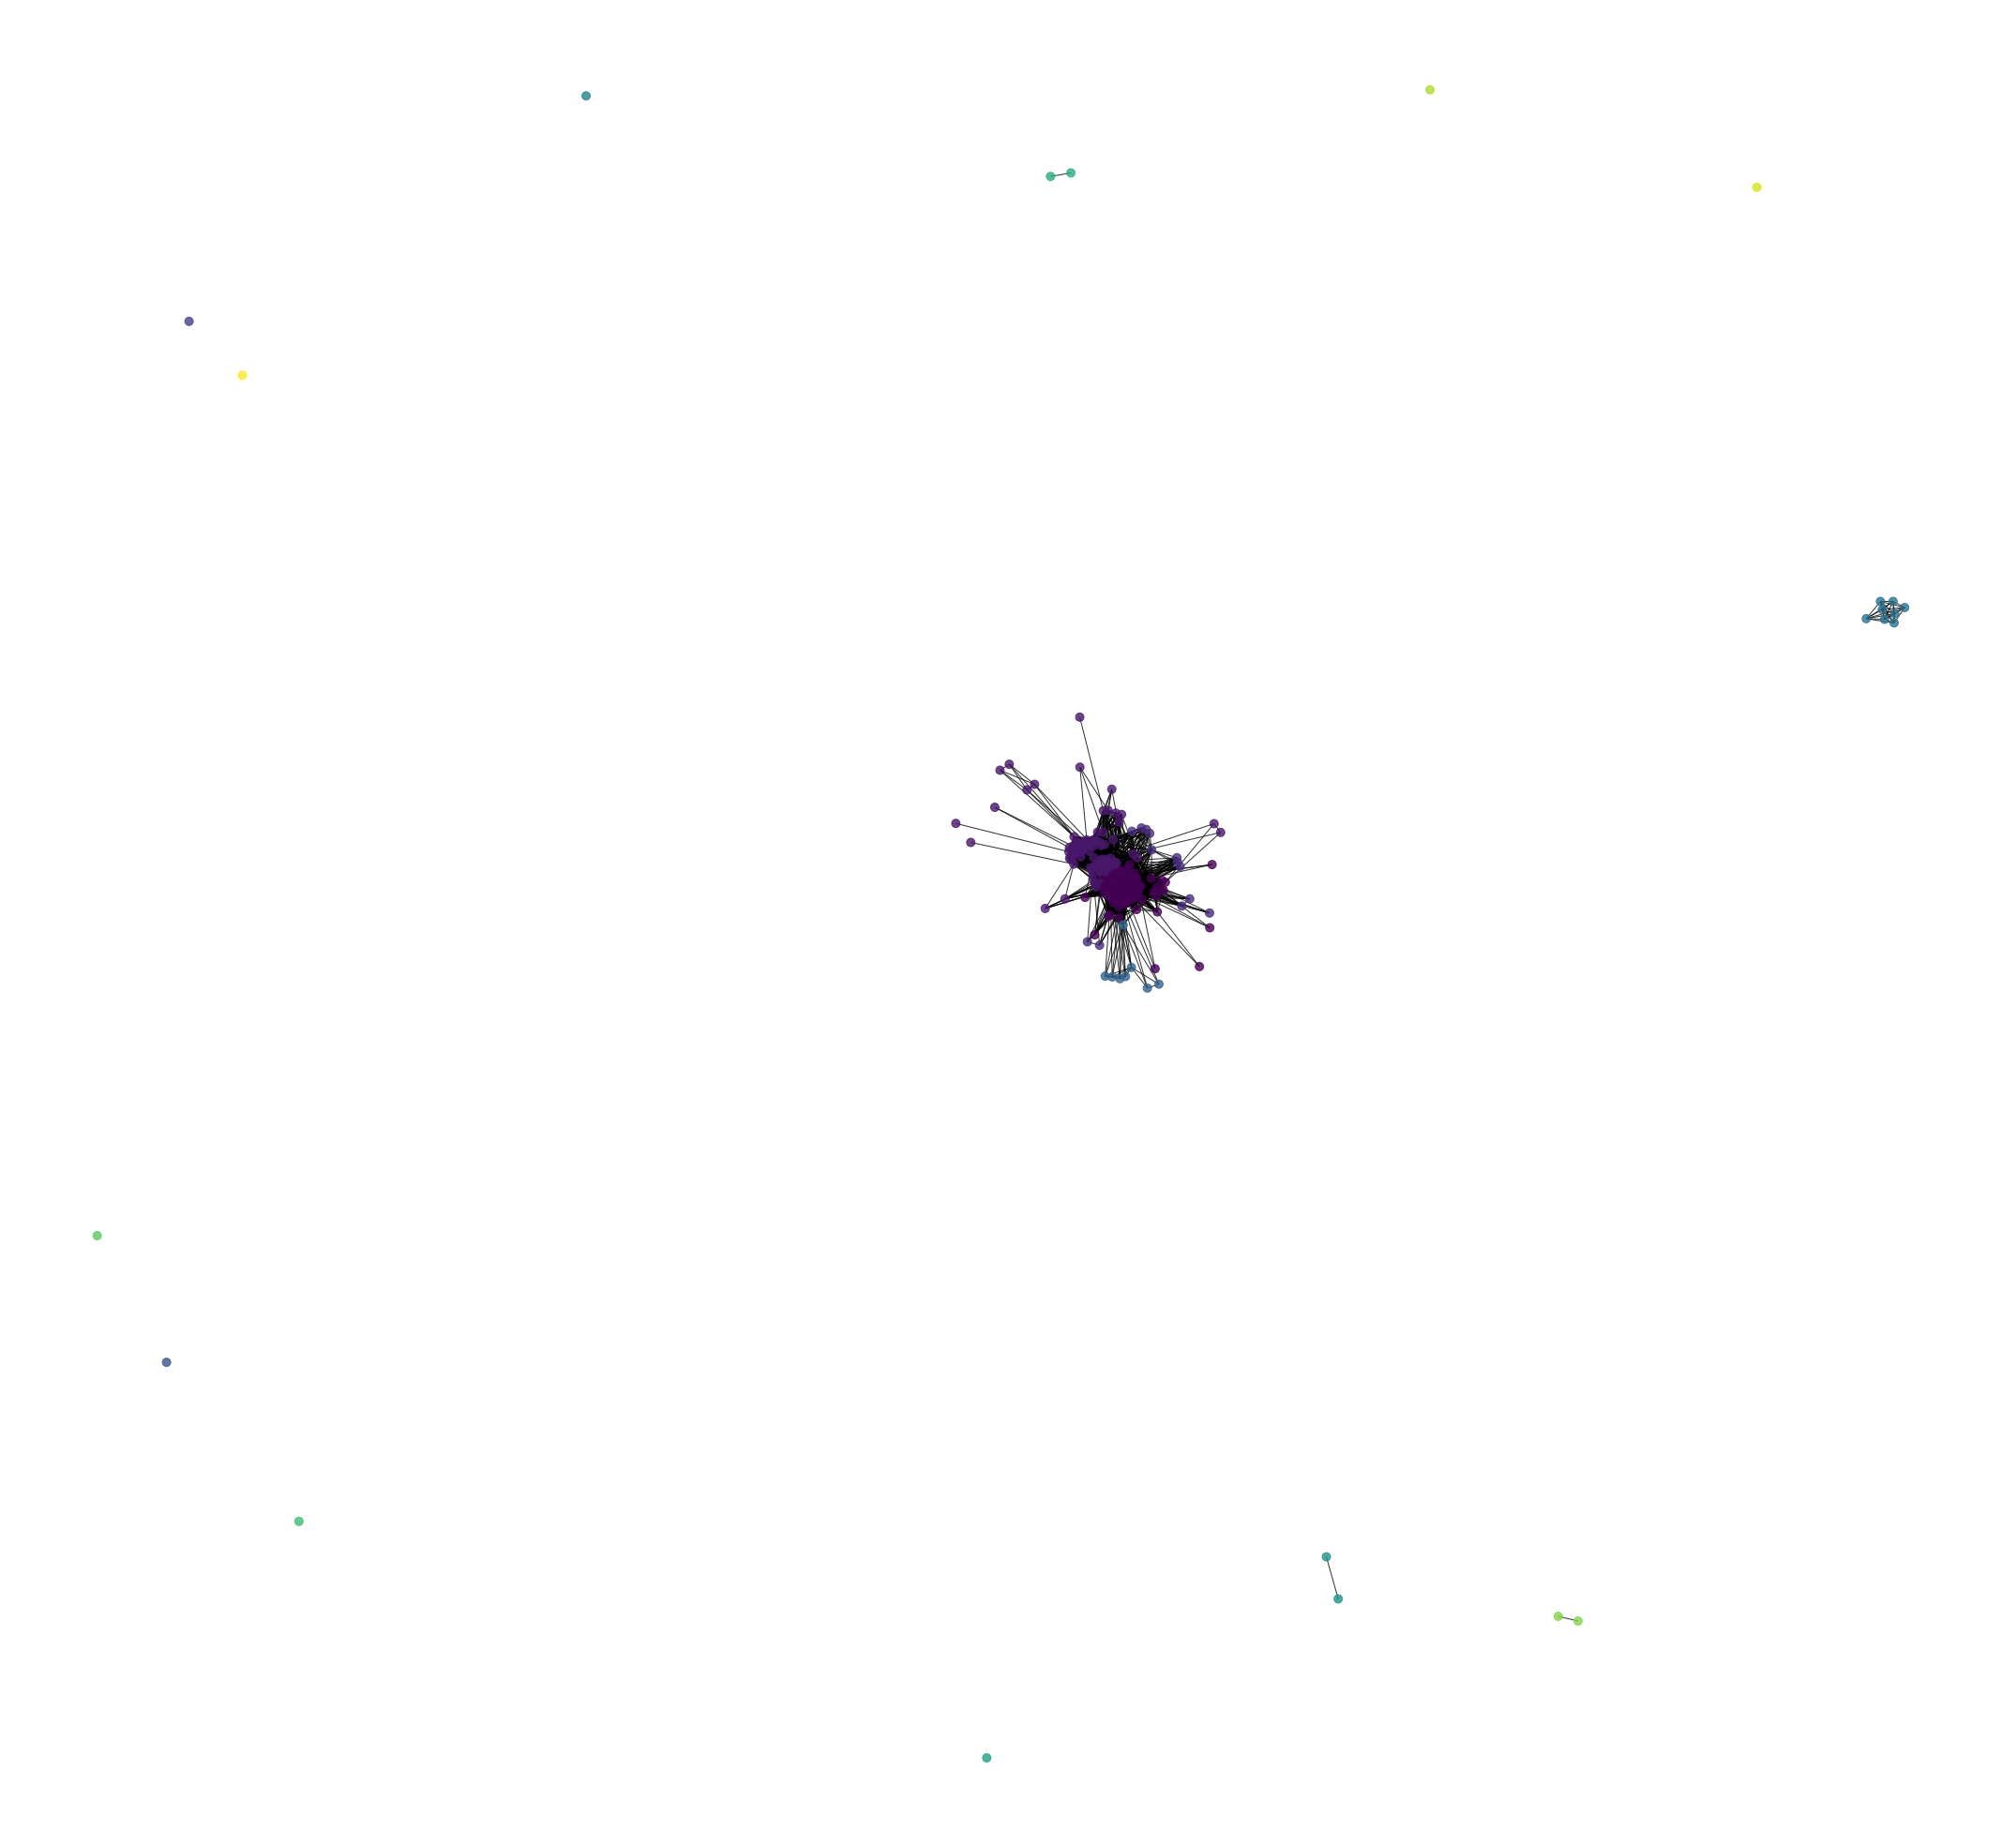

In [18]:
# set the figure
fig = plt.figure(figsize = (38, 36))

# draw the graph
pos = nx.spring_layout(g_b)

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

nx.draw_networkx_nodes(g_b, pos, partition.keys(), 
                       node_size=80, alpha = 0.8,
                       cmap=cmap, node_color=list(partition.values()))

nx.draw_networkx_edges(g_b, pos, alpha=0.8)

plt.axis("off")

# save the plot
outfile = os.path.join(wd, 'genre graph_louvain.png')
plt.savefig(outfile)

# get artist list with community id (optional)
- a new csv file (artist_list.csv) was created in this step
- this file contains artist name, community, and community size

In [19]:
df_community = pd.DataFrame({
    'artist_name' : list(partition.keys()),
    'community_id' : list(partition.values())
    })

In [20]:
# get community size for each community
for i in df_community.index:
    c = df_community.loc[i, 'community_id']
    data = df_community[df_community['community_id'] == c]
    community_size = len(list(data.index))
    df_community.loc[i, 'community_size'] = community_size

In [21]:
# save artist list
outfile = os.path.join(wd, 'artist_list.csv')
df_community.to_csv(outfile, index = False)

# save partition as an csv file for step 2

In [22]:
partition

{'JID': 0,
 'Kanye West': 0,
 'Empress Of': 1,
 'Ne-Yo': 1,
 'Murda Beatz': 1,
 'Jeremih': 1,
 'Bryson Tiller': 1,
 'Tierra Whack': 1,
 'Mez': 0,
 'EARTHGANG': 0,
 'YNW Melly': 0,
 'Miguel': 1,
 'Lil Duval': 0,
 '9lokknine': 0,
 'Cozz': 0,
 'London On Da Track': 0,
 '24kGoldn': 2,
 'Post Malone': 0,
 'Trippie Redd': 0,
 'Jessie Reyez': 1,
 'Nipsey Hussle': 0,
 'Tay-K': 0,
 'KIDS SEE GHOSTS': 0,
 'Sada Baby': 0,
 'Lil Xan': 0,
 'DDG': 0,
 'Young Scooter': 0,
 'Halsey': 1,
 'WhoHeem': 2,
 'YG': 0,
 'Young M.A': 0,
 'Lil Skies': 0,
 'Childish Gambino': 0,
 'Stevie Wonder': 1,
 'Ball Greezy': 2,
 'YFN Lucci': 0,
 '21 Savage': 0,
 'Doe Boy': 0,
 'DJ Chose': 1,
 'DaBaby': 0,
 'Chief Keef': 0,
 'Gesaffelstein': 3,
 'Fred Hammond': 4,
 'Calvin Harris': 1,
 'Khalid': 1,
 'SAINt JHN': 0,
 'Mike WiLL Made-It': 0,
 'Yella Beezy': 0,
 'NLE Choppa': 0,
 'StaySolidRocky': 0,
 'Rowdy Rebel': 5,
 'Lizzo': 1,
 'Bastille': 1,
 'Royce Da 5\'9"': 0,
 'Playboi Carti': 0,
 'X Ambassadors': 1,
 'Yo Gotti': 0,

In [23]:
# save partition_df as csv file
partition_df = pd.DataFrame.from_dict(partition, orient='index')
partition_df = partition_df.reset_index().rename(columns = {'index': 'artist', 0: 'community'})
partition_df.to_csv('partition.csv', index = False)

# find key genres of each community

In [24]:
# merge community with genre by artist
genre_community = pd.merge(partition_df, artist_genre,
                           left_on = 'artist',
                           right_on = 'artist_name').drop('artist_name', 
                                                          axis = 1)
genre_community

,artist,community,genre
0,JID,0,hip hop
1,JID,0,rap
2,JID,0,underground hip hop
3,Kanye West,0,chicago rap
4,Kanye West,0,rap
...,...,...,...
1306,Metro Boomin,0,hip hop
1307,Metro Boomin,0,pop rap
1308,Metro Boomin,0,rap
1309,Metro Boomin,0,southern hip hop


## method 1: view by .csv

In [25]:
# create a new column 'count' to save the number of common genres
genre_community.loc[:, 'count'] = 1
gc = genre_community.groupby(['community', 'genre'])['count'].sum()
gc_df = pd.DataFrame(gc).reset_index()
gc_df = gc_df.sort_values(by = ['community', 'count'])
gc_df

,community,genre,count
2,0,alternative r&b,1
3,0,arkansas hip hop,1
7,0,battle rap,1
8,0,birmingham grime,1
9,0,boston hip hop,1
...,...,...,...
237,13,south african hip hop,2
239,14,chill r&b,1
240,15,gqom,1
241,16,chinese hip hop,1


In [26]:
# save df to csv file
gc_df.to_csv('gc.csv', index = False)

## method 2: view by word cloud

In [27]:
# %% create a word cloud for key words in each community

# install wordcloud first if you don't have this pkg
# conda install -c conda-forge wordcloud

In [28]:
# import relevant libraries
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [29]:
# create a community - genre data frame
cg = gc_df[['community', 'genre']]
cg

,community,genre
2,0,alternative r&b
3,0,arkansas hip hop
7,0,battle rap
8,0,birmingham grime
9,0,boston hip hop
...,...,...
237,13,south african hip hop
239,14,chill r&b
240,15,gqom
241,16,chinese hip hop


In [30]:
# convert it to dictionary
cg1 = cg.groupby('community')['genre'].apply(lambda x :list(set(x)))
cg1 = dict(cg1)
cg1

{0: ['philly rap',
  'canadian pop',
  'scam rap',
  'florida rap',
  'canadian hip hop',
  'comedy rap',
  'indie hip hop',
  'chicago drill',
  'tennessee hip hop',
  'atl trap',
  'melodic rap',
  'oakland hip hop',
  'west coast trap',
  'gangster rap',
  'miami hip hop',
  'electro house',
  'underground hip hop',
  'rap conscient',
  'indie pop rap',
  'queens hip hop',
  'brooklyn drill',
  'dmv rap',
  'crunk',
  'north carolina hip hop',
  'sad rap',
  'escape room',
  'alabama rap',
  'alternative hip hop',
  'dfw rap',
  'baton rouge rap',
  'oc rap',
  'bronx hip hop',
  'virginia hip hop',
  'boston hip hop',
  'psychedelic hip hop',
  'g funk',
  'hip pop',
  'memphis hip hop',
  'houston rap',
  'birmingham grime',
  'new york drill',
  'southern hip hop',
  'nyc rap',
  'toronto rap',
  'instrumental grime',
  'edm',
  'detroit trap',
  'dirty south rap',
  'electronic trap',
  'pop r&b',
  'hardcore hip hop',
  'mississippi hip hop',
  'battle rap',
  'hawaiian hip hop

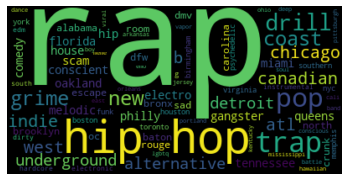

In [31]:
c0 = cg1[0]
c0 = ' '.join(c0).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c0)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c0.png')

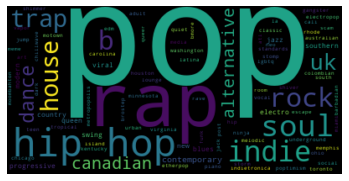

In [32]:
c1 = cg1[1]
c1 = ' '.join(c1).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c1)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c1.png')

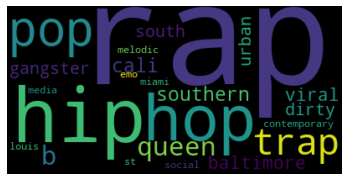

In [33]:
c2 = cg1[2]
c2 = ' '.join(c2).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c2)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c2.png')

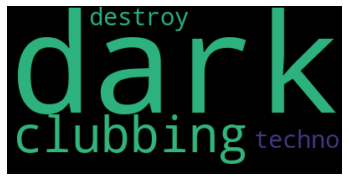

In [34]:
c3 = cg1[3]
c3 = ' '.join(c3).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c3)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c3.png')

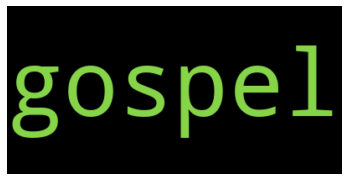

In [35]:
c4 = cg1[4]
c4 = ' '.join(c4).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c4)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c4.png')

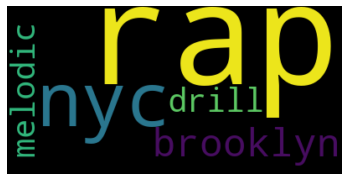

In [36]:
# c5
c5 = cg1[5]
c5 = ' '.join(c5).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c5)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c5.png')

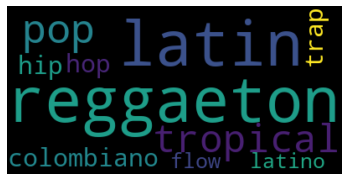

In [37]:
# c6
c6 = cg1[6]
c6 = ' '.join(c6).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c6)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c6.png')

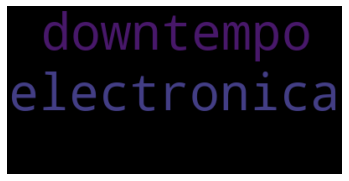

In [38]:
# c7
c7 = cg1[7]
c7 = ' '.join(c7).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c7)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c7.png')

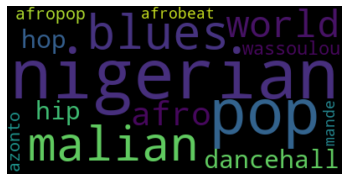

In [39]:
# c8
c8 = cg1[8]
c8 = ' '.join(c8).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c8)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c8.png')

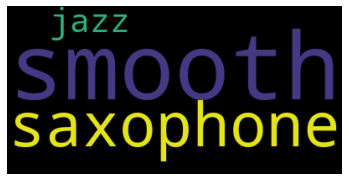

In [40]:
# c9
c9 = cg1[9]
c9 = ' '.join(c9).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c9)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c9.png')

In [41]:
cg1[9]

['smooth saxophone', 'smooth jazz']

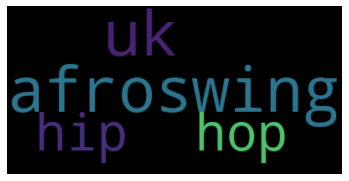

In [42]:
# c10
c10 = cg1[10]
c10 = ' '.join(c10).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c10.png')

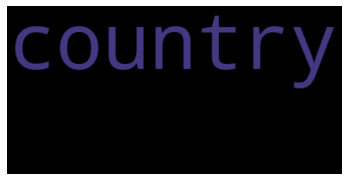

In [43]:
# c11
c11 = cg1[11]
c11 = ' '.join(c11).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c11)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c11.png')

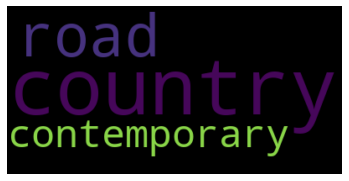

In [44]:
# c12
c12 = cg1[12]
c12 = ' '.join(c12).lower()

wordcloud = WordCloud(max_font_size = 200).generate(c12)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c12.png')

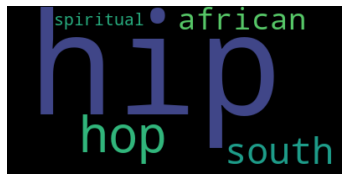

In [45]:
# c13
c13 = cg1[13]
c13 = ' '.join(c13).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c13)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c13.png')

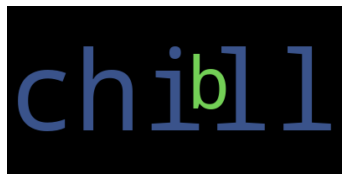

In [46]:
# c14
c14 = cg1[14]
c14 = ' '.join(c14).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c14)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c14.png')

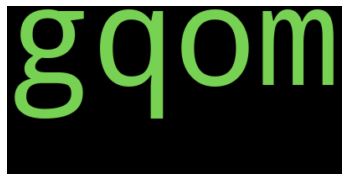

In [47]:
# c15
c15 = cg1[15]
c15 = ' '.join(c15).lower()

wordcloud = WordCloud(max_font_size = 300).generate(c15)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# save the image 
wordcloud.to_file('c15.png')

In [48]:
print(cg1[15])

['gqom']
